# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [317]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Understanding the structure of the data

In [318]:
#Formato de display
pd.options.display.float_format = '{:15.2f}'.format

In [319]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [320]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/AAA-MIT/W2_Stats/W2_project_assessment/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [321]:
# We show the shape of the dataset.
df.shape

(1898, 9)

#### Observations:
There are 1898 rows in the data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [322]:
# We show the information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
We can see that in the data, we have data types as integer (int64), string (object) and float (float64).

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [323]:
# We show if there is any missing value in the dataset.
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There is no missing value in the data. All columns have 1898 values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [324]:
# We check the statistical summary of the dataset.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.00,NaN,NaN,NaN,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,NaN,NaN,NaN,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.00,NaN,NaN,NaN,16.50,7.48,4.47,12.08,14.14,22.30,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.00,NaN,NaN,NaN,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,NaN,NaN,NaN,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
From the statistical summary of the data, we can see that for the food to be prepared it takes : minimum 20 minutes, average 27.37 minutes and maximum 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [325]:
# We look at the values of rating.
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [326]:
# We look at the values of rating in percentage.
df.rating.value_counts(normalize = True)

Not given              0.39
5                      0.31
4                      0.20
3                      0.10
Name: rating, dtype: float64

#### Observations:
From the data, 736 orders are not rated which represents 39% of orders.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [327]:
#We start by exploring the NUMERICAL VALUES

In [328]:
def histogram_boxplot(feature, figsize=(10, 5), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='yellow')

    # For histogram
    sns.histplot(x=feature, kde=True, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

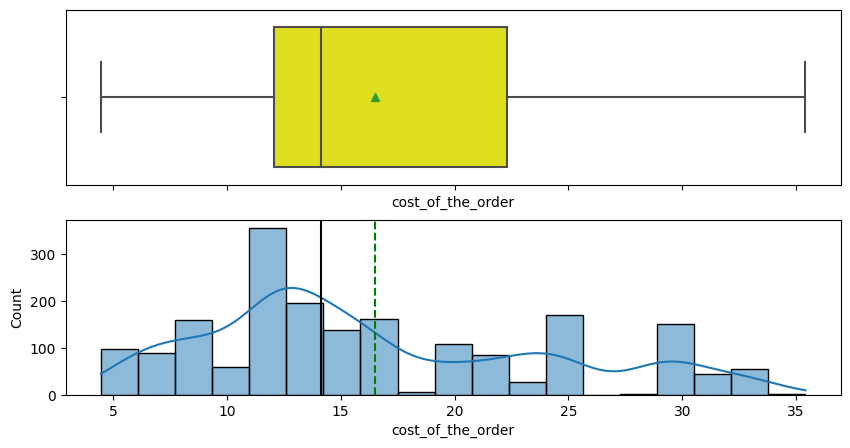

In [329]:
#Observations on Cost of the Order
histogram_boxplot(df.cost_of_the_order)

In [330]:
#Obervations
# - the median of cost of order is less than the mean, distribution little skewed to the right.
# - there are no outliers
# 350 orders have a cost of around 11 usd

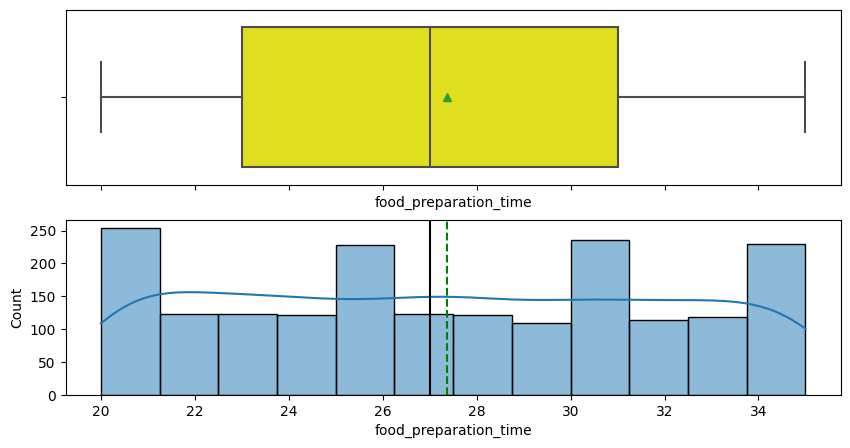

In [331]:
#Observations on Food Preparation Time
histogram_boxplot(df.food_preparation_time)

In [332]:
#Obervations
# - the median of food preparation time is very similar to mean
# - the distribution seems almost uniform apart from 4 bins
# - there are no outliers
# It would be interesting to see the preparation time depending on hours of the day to see if same proportions are reflected

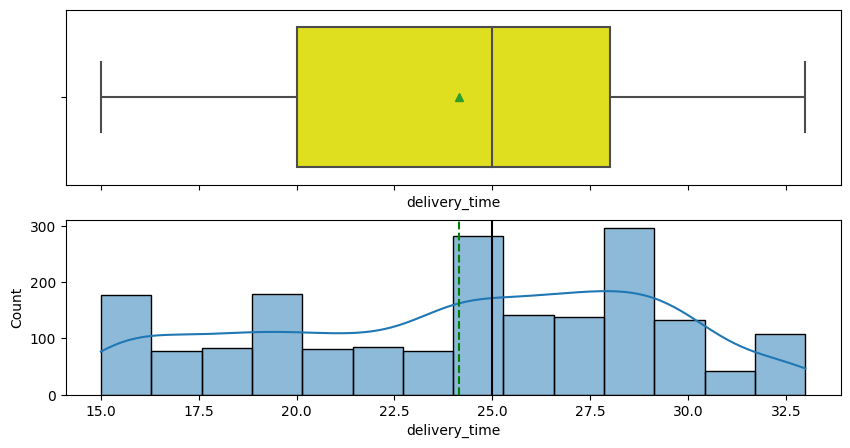

In [333]:
#Observations on Delivery Time
histogram_boxplot(df.delivery_time)

In [334]:
# - The delivery time is between 15 and 33 mins with an average of 25 mins
# - there are no outliers
# - Most of orders are around 25 mins and 28 mins
# It would be interesting to see the delivery time depending on hours of the day to see if same proportions are reflected maybe depending on traffic issues in the city (any correlation)

In [335]:
#We continue by exploring the CATEGORIAL VALUES

In [336]:
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (10, 5))
    plt.xticks(rotation=45)

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

    plt.show()                                                      # Display the plot

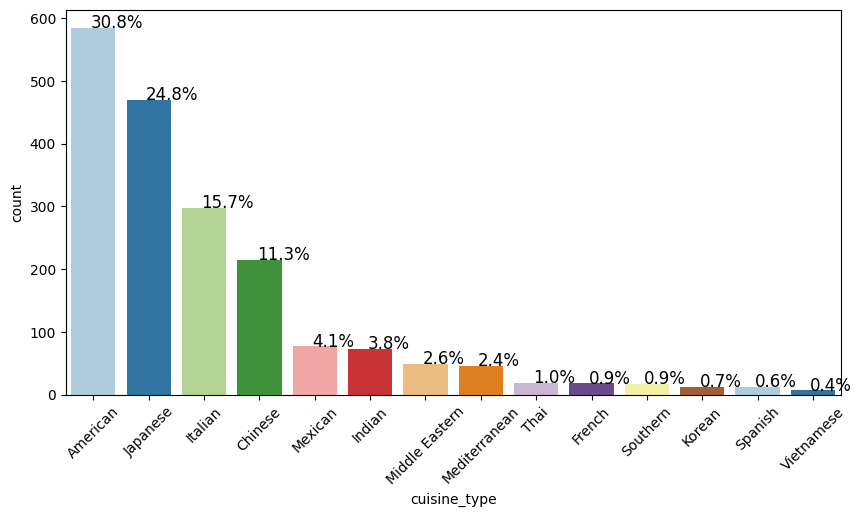

In [337]:
#Observations on Cuisine Type
bar_perc(df, 'cuisine_type')

In [338]:
# - The top 3 cuisine type are American (31%), Japanese (25%) and Italian (16%).


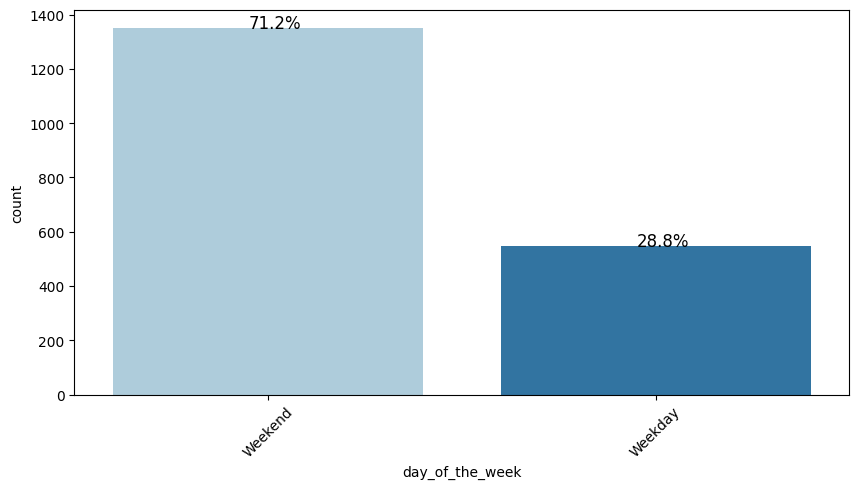

In [339]:
#Observations on Day of the Week
bar_perc(df, 'day_of_the_week')

In [340]:
# - 71% of orders are placed during weekends (Saturday and Sunday)


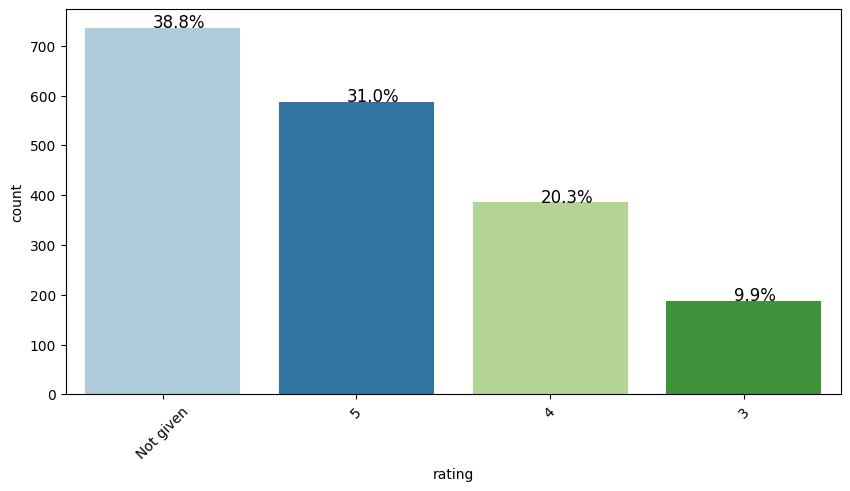

In [341]:
#Observations on Rating
bar_perc(df, 'rating')

In [342]:
# - Eventhough most of the orders are not rated. The most rated orders optain 5 stars.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [343]:
# We order the restaurants by number of orders.
df.restaurant_name.value_counts(ascending=False).head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [344]:
# We order the restaurants by number of orders (in percentage)
df.restaurant_name.value_counts(normalize=True, ascending=False).head(5)

Shake Shack                            0.12
The Meatball Shop                      0.07
Blue Ribbon Sushi                      0.06
Blue Ribbon Fried Chicken              0.05
Parm                                   0.04
Name: restaurant_name, dtype: float64

#### Observations:
The top 5 restaurants in terms of orders received are Shake Shack (12%), The Meatball Shop (7%), Blue Ribbon Sushi (6%), Blue Ribbon Fried Chicken (5%) and Parm (4%).

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [345]:
# We sort the type of cuisine depending on day of the week.
df.groupby('day_of_the_week')['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations:
The most popular cuisine on weekend is American.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [346]:
# We sort orders that cost more than 20 usd.
sup20 = df['cost_of_the_order'] >= 20
sup20

0        True
1       False
2       False
3        True
4       False
        ...  
1893     True
1894    False
1895     True
1896    False
1897    False
Name: cost_of_the_order, Length: 1898, dtype: bool

In [347]:
# We sort orders that cost more than 20 usd by percentage.
sup20.value_counts(normalize=True)

False              0.71
True               0.29
Name: cost_of_the_order, dtype: float64

In [348]:
# We see how many orders cost more than 20 usd.
df[df['cost_of_the_order'] >= 20].value_counts(normalize=True)

order_id  customer_id  restaurant_name                        cuisine_type    cost_of_the_order  day_of_the_week  rating     food_preparation_time  delivery_time
1476560   149508       Shake Shack                            American        22.26              Weekend          4          32                     17                         0.00
1477852   74412        da Umberto                             Italian         32.98              Weekend          Not given  30                     28                         0.00
1477846   52574        Blue Ribbon Sushi                      Japanese        24.25              Weekday          5          30                     26                         0.00
1477847   106478       Blue Ribbon Sushi                      Japanese        24.25              Weekday          4          22                     29                         0.00
1477848   276192       12 Chairs                              Middle Eastern  29.05              Weekday          5   

#### Observations:
I'm not sure of this is the correct codes by I was able to find with these 2 code options that 555 orders cost more than 20 dollars, which is 29% of orders.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [349]:
# We calculate the average of the delivery time
mean_delivery_time = df.delivery_time.mean()
mean_delivery_time

24.161749209694417

In [350]:
print('The mean delivery time is', round(mean_delivery_time, 2), 'minutes')

The mean delivery time is 24.16 minutes


#### Observations:
The average delivery time is 24.16 mins.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [351]:
# We sort the top 3 customers that made most orders.
df.customer_id.value_counts(ascending=False).head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The top 3 customers are number 52832 with 13 orders, the second one is number 47440 with 10 orders and the third one is number 83287 with 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [352]:
#Correlation of the numerical values

In [353]:
corr = df.corr()
corr

<ipython-input-353-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.00,-0.01,0.02,-0.01,0.01
customer_id,-0.01,1.00,-0.00,-0.03,-0.01
cost_of_the_order,0.02,-0.00,1.00,0.04,-0.03
food_preparation_time,-0.01,-0.03,0.04,1.00,0.01
delivery_time,0.01,-0.01,-0.03,0.01,1.00


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


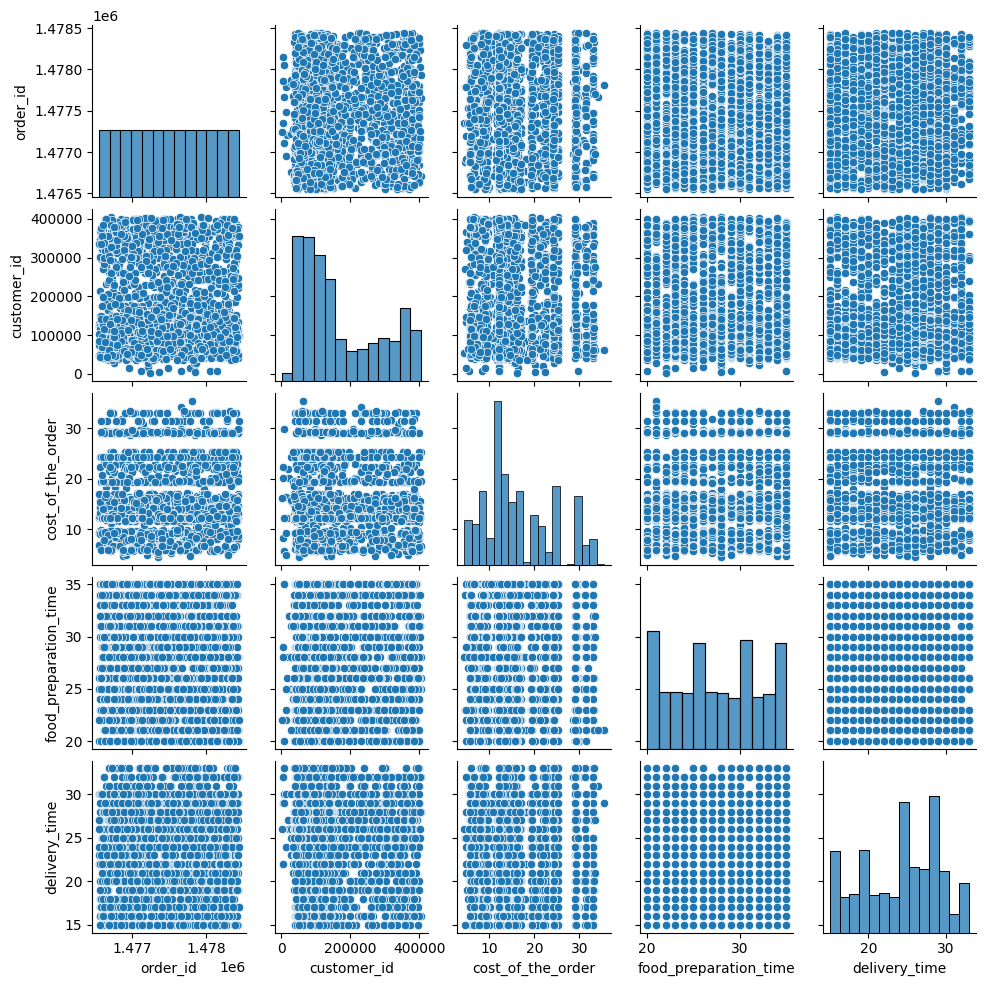

In [354]:
sns.pairplot(df, size=2);

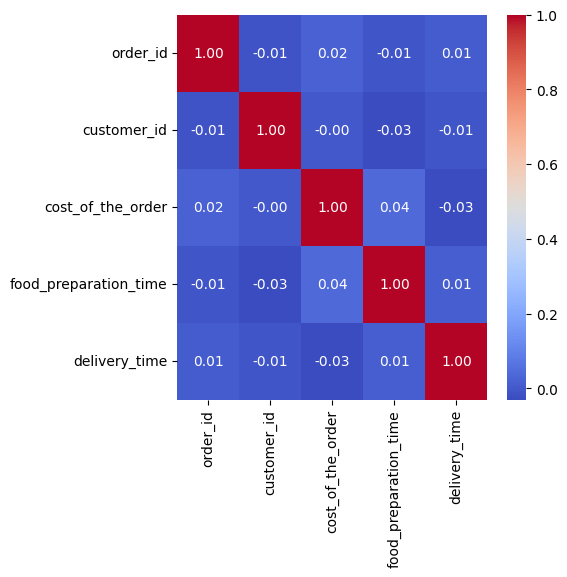

In [355]:
plt.figure(figsize = (5, 5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
        fmt = ".2f",
        xticklabels = corr.columns,
        yticklabels = corr.columns);

In [356]:
#Correlation between Categorical values and numerical values

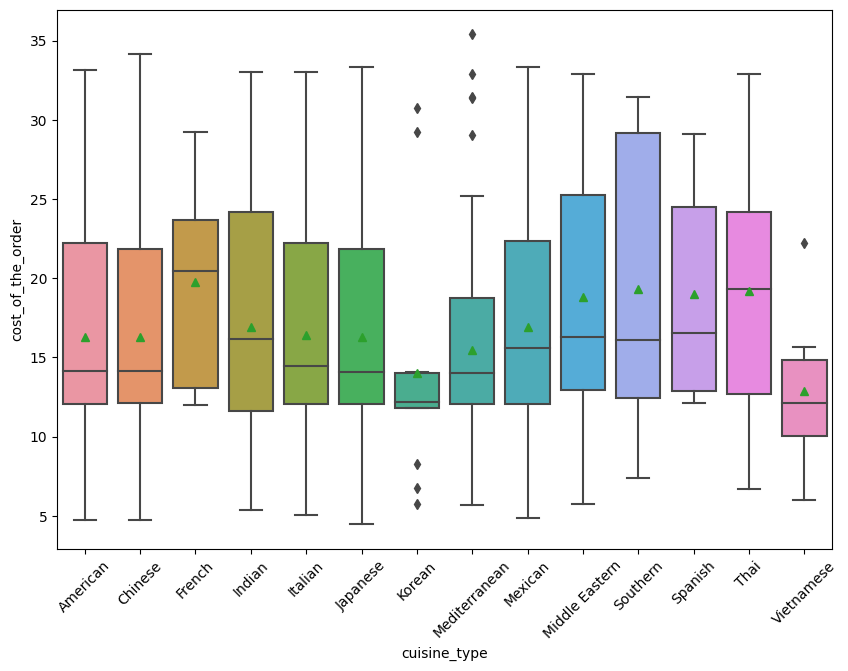

In [357]:
#Relation between Cuisine type and Cost of the Order
plt.figure(figsize=(10,7))
sns.boxplot(data = df, x = "cuisine_type", y = "cost_of_the_order", showmeans=True)
plt.xticks(rotation = 45)
plt.show()

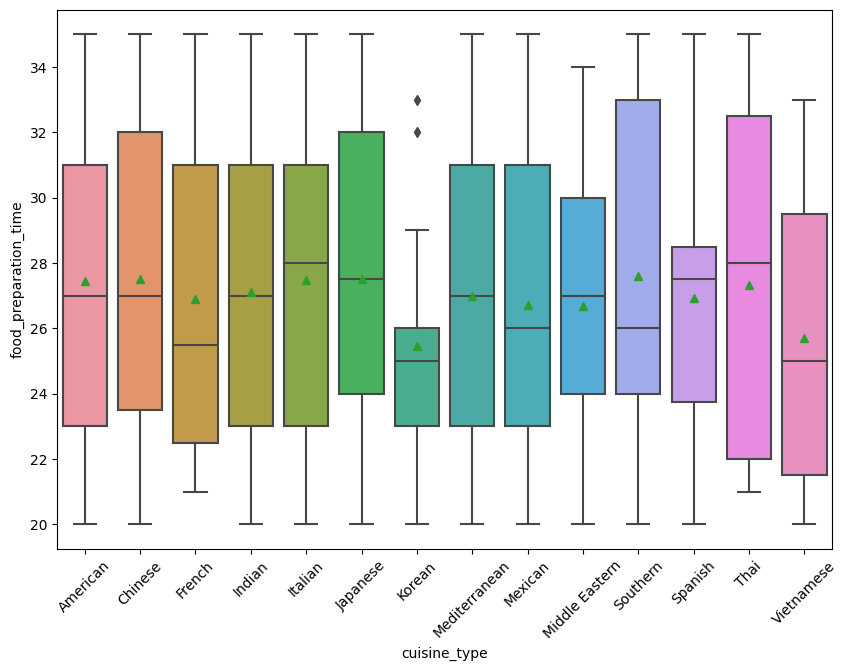

In [358]:
#Relation between Cuisine type and Food Preparation Time
plt.figure(figsize=(10,7))
sns.boxplot(data = df, x = "cuisine_type", y = "food_preparation_time", showmeans=True)
plt.xticks(rotation = 45)
plt.show()

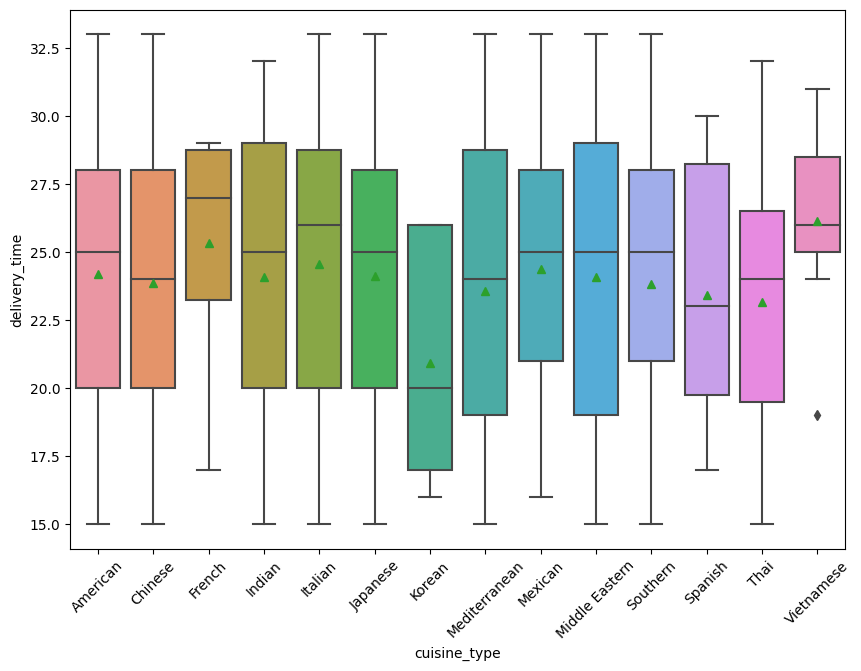

In [359]:
#Relation between Cuisine type and Delivery Time
plt.figure(figsize=(10,7))
sns.boxplot(data = df, x = "cuisine_type", y = "delivery_time", showmeans=True)
plt.xticks(rotation = 45)
plt.show()

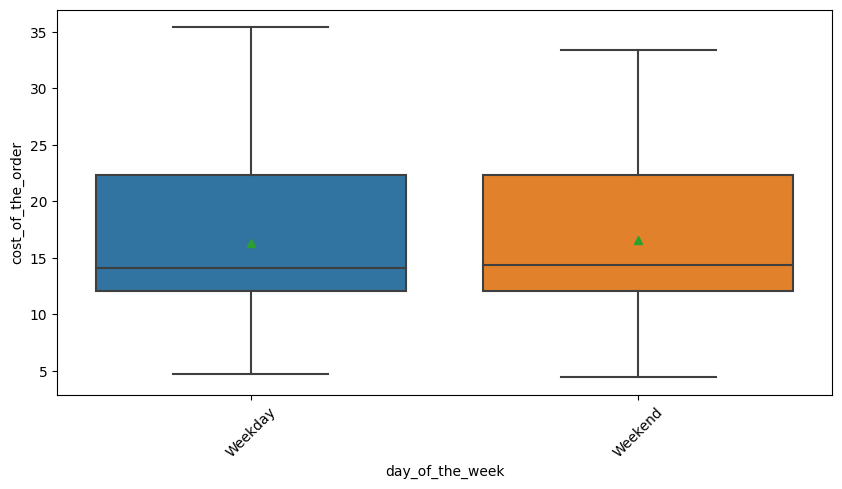

In [360]:
#Relation between Weekday/Weekend and Cost of the Order
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x = "day_of_the_week", y = "cost_of_the_order", showmeans=True)
plt.xticks(rotation = 45)
plt.show()

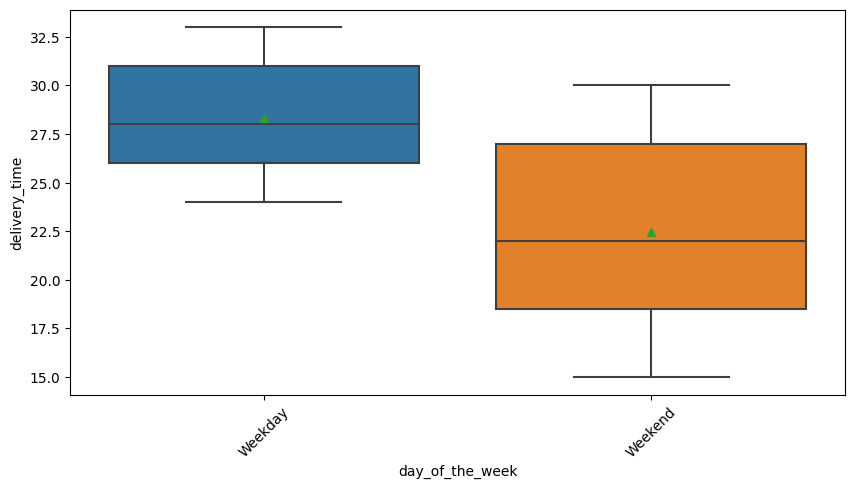

In [381]:
#Relation between Weekday/Weekend and Delivery Time
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x = "day_of_the_week", y = "delivery_time", showmeans=True)
plt.xticks(rotation = 45)
plt.show()

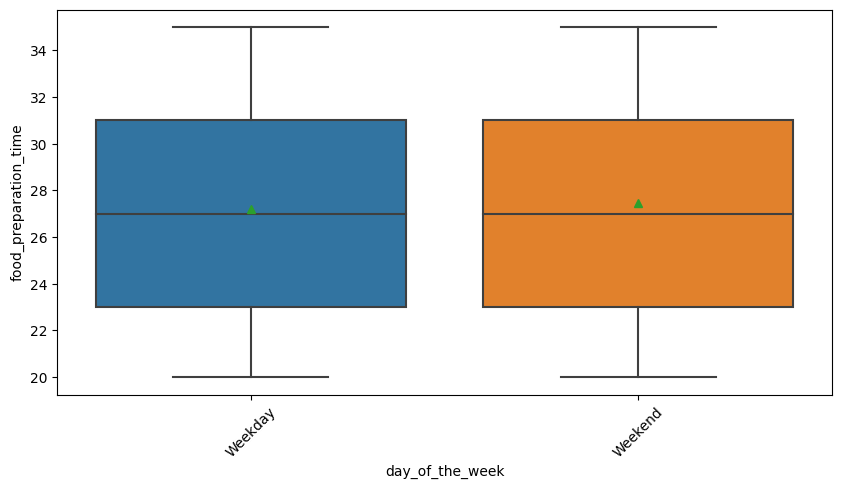

In [382]:
#Relation between Weekday/Weekend and Food Preparation Time
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x = "day_of_the_week", y = "food_preparation_time", showmeans=True)
plt.xticks(rotation = 45)
plt.show()

In [363]:
# Total revenue from restaurants
df.cost_of_the_order.sum()

31314.82

In [364]:
# Total number of restaurants
df.restaurant_name.nunique()

178

In [365]:
# Total revenue per restaurants
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False)

restaurant_name
Shake Shack                          3579.53
The Meatball Shop                    2145.21
Blue Ribbon Sushi                    1903.95
Blue Ribbon Fried Chicken            1662.29
Parm                                 1112.76
                                   ...      
Market Table                            6.79
Wa Jeal                                 6.74
Cipriani Le Specialita                  5.92
Big Wong Restaurant _¤¾Ñ¼              5.92
Hunan Manor                             5.72
Name: cost_of_the_order, Length: 178, dtype: float64

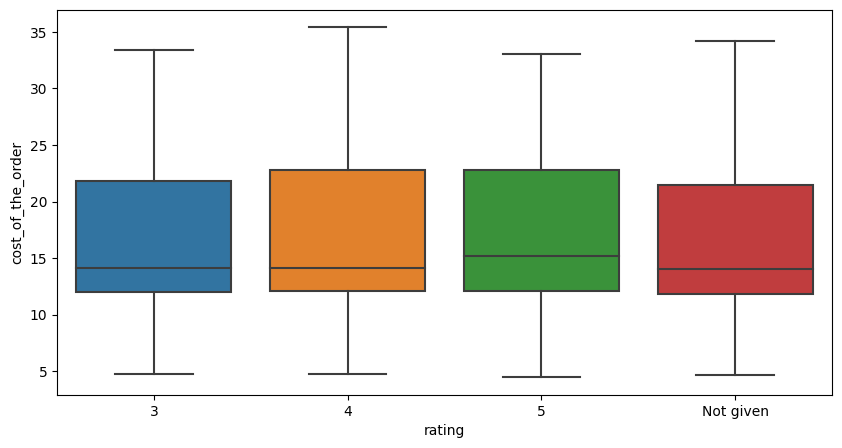

In [366]:
# Relation between Rating and Cost of the Order
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

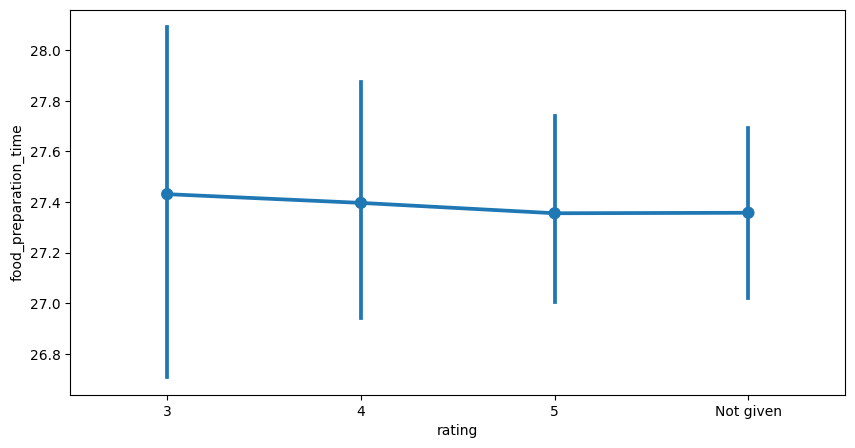

In [367]:
# Relation between Rating and Food Preparation Time
plt.figure(figsize=(10, 5))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

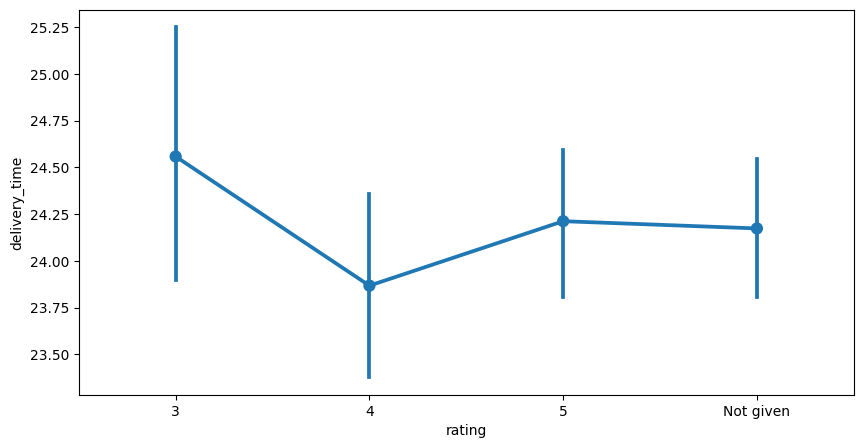

In [368]:
# Relation between Rating and Delivery Time
plt.figure(figsize=(10, 5))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

In [369]:
#Observations
# From the heatmap and pairplot graphics, it does not seem to be any relationships between the important numerical variables in the dataset (cost, food preparation time, delivery time)
# Relation between Cuisine type and Cost of the Order : Korean and Vietnamese have the most economical cost while French has the most expensive average orders. Korean and Mediterranean have outliers.
# The top 3 cuisine type orders follow the same cost of order patterns
# Relation between Cuisine type and Food Preparation Time : Korean and Vietnamese are the quickest with similar patterns. Korean has outliers. Southern is the wider range in food preparation time.
# The top 3 cuisine type orders follow pretty wide preparation time range.
# Relation between Cuisine type and Delivery Time : French and Vietnamese show much higher delivery time compared to all others. Korean cuisine has by far the lowest delivery time average. The top 3 cuisine type orders follow pretty wide and similar delivery time range.

# Relation between Weekday/Weekend and Cost of the Order is very similar
# Relation between Weekday/Weekend and Delivery Time is very different. The Delivery time is much higher during Weekdays.
# Relation between Weekday/Weekend and Food Preparation Time is almost the same.

# Relation between Rating and Cost of the Order: higher the cost of the order, higher is the rating
# Relation between Rating and Food Preparation Time : the one for 3 star rating is more variable in timing
# Relation between Rating and Delivery Time : Delivery time is higher when 3 star
# 3 star rating have both higher delivery time and food preparation time


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [370]:
# We look at the values for rating
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [371]:
# We have an issue since lots of values of Rating column are Not Given. We are going to remove these rows.
# We create a copy of the dataframe
new_df = df.copy()

In [374]:
# We locate the not given rows to be dropped
not_given = new_df.loc[new_df['rating'] == 'Not given'].value_counts()
not_given


order_id  customer_id  restaurant_name        cuisine_type   cost_of_the_order  day_of_the_week  rating     food_preparation_time  delivery_time
1476551   49034        The Smile              American       12.18              Weekend          Not given  22                     27               1
1477772   91958        TAO                    Japanese       12.18              Weekday          Not given  26                     33               1
1477753   65306        Sushi of Gari Tribeca  Japanese       14.79              Weekend          Not given  32                     24               1
1477756   251607       Shake Shack            American       14.12              Weekday          Not given  31                     28               1
1477757   60688        Shake Shack            American       14.12              Weekend          Not given  29                     30               1
                                                                                                         

In [375]:
# We sort the restaurants by number of rating (incl. not given)
rating_rest = df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
rating_rest


,restaurant_name,rating
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68
...,...,...
173,Klong,1
174,Kambi Ramen House,1
175,Il Bambino,1
176,Hunan Manor,1


In [380]:
# And... I´m stuck here... I don´t know how to continue to find the answer. Sorry...

#### Observations:
#  And... I´m stuck here... I don´t know how to continue to find the answer. Sorry...

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# When cost_of_the_order > 20 usd, commission 25%
# When cost_of_the_order > 5 usd, commission 15%

In [ ]:
# Add a new column called commission

In [ ]:
# Build a function to apply the commission to Cost of Order
def commission(x):
    if x > 20:
        return x * 0.25
    elif  x > 5:
        return x * 0.15
    else:
        return 0

In [ ]:
# Add new column called commission with its value calculated from above function
df['commission'] = df['cost_of_the_order'].apply(commission)
df

In [ ]:
df.commission.sum()

In [ ]:
# The net revenue generated by the company across all orders is 6,166.30 USD

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# We add a new column for total time, that is the sum of Food Preparation Time plus Delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df

In [ ]:
# We locate the orders where the total time is superior to 60 minutes
total_time_60 = df.loc[df['total_time']>60]
total_time_60

In [ ]:
# We calculate the porcentage of total time orders superior to 60 mins compared to the total number of orders
total_time_60.order_id.count()

In [ ]:
df.order_id.shape[0]

In [ ]:
round(total_time_60.order_id.count() / df.order_id.shape[0] * 100, 2)

#### Observations:
The percentage of orders take more than 60 minutes to get delivered from the time the order is placed is 10.54%.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# We look at the values of weekend and weekday of delivery time
df.day_of_the_week.value_counts()

In [ ]:
(df['day_of_the_week']=='Weekend').sum()

In [ ]:
(df['day_of_the_week']=='Weekday').sum()

In [ ]:
# We calculate the mean of weekend delivery time
round(df[df['day_of_the_week']=='Weekend']['delivery_time'].mean(), 2)

In [ ]:
# We calculate the mean of weekday delivery time
round(df[df['day_of_the_week']=='Weekday']['delivery_time'].mean(),2)

#### Observations:
The mean delivery time vary during weekdays and weekends. During Weekend, the mean is 22.47 minutes while during Weekday, it is 28.34 minutes.

The mean of delivery time is higher during Weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Through its smartphone app, the company FoodHub offers access to 178 restaurants in New York. In the information given, we are looking at data from 1898 orders made to those restaurants through the FoodHub app.
Lukely, all data is given and there is no missing value.
Only in the Rating information, we are facing that 39% of the values are “not given”.

* The univariate analysis shows that most of the data is well distributed. Not much outliers found.

* Regarding the cost of the order, the average is 16.50 usd with 50% of orders (median) at 14.14 usd.  And 29% of orders cost more than 20 usd.

* The food preparation time is on average at 27.37 mins with 50% of time at 27 mins.

* The delivery time is on average at 24.16 mins with 50% of time at 25 mins.

* The most ordered cuisine type are American (31%), Japanese (25%) and Italian (16%).
71% of the orders are made during Weekend (Saturday and Sunday) and the most ordered cuisine is American.

* In the rating range, apart from the Not Given rating we have talked before, the most rated orders obtain 5 stars.

* The top 5 restaurants in terms of orders received are Shake Shack (12%), The Meatball Shop (7%), Blue Ribbon Sushi (6%), Blue Ribbon Fried Chicken (5%) and Parm (4%).

* The multivariate analysis shows that there is no correlation (relationship) between the cost of the order, food preparation time and delivery time.

* Relation between Cuisine type and Cost of the Order :
Korean and Vietnamese have the most economical cost while French has the most expensive average orders. Korean and Mediterranean shows some outliers.
The top 3 cuisine type orders follow the same cost of order patterns

* Relation between Cuisine type and Food Preparation Time :
Korean and Vietnamese are the quickest with similar patterns. Korean shows outliers. Southern is the wider range in food preparation time.
The top 3 cuisine type orders follow pretty wide preparation time range.

* Relation between Cuisine type and Delivery Time :
French and Vietnamese show much higher delivery time compared to all others. Korean cuisine has by far the lowest delivery time average.
The top 3 cuisine type orders follow pretty wide and similar delivery time range.

* Relation between Weekday/Weekend and Cost of the Order is very similar

* Relation between Weekday/Weekend and Delivery Time is very different. The Delivery time is much higher during Weekdays while the Food Preparation Time is almost the same each day.

* Relation between Rating and Cost of the Order: higher the cost of the order, higher is the rating.

* Relation between Rating and Food Preparation Time : the one for 3 star rating is more variable in timing.

* Relation between Rating and Delivery Time : Delivery time is higher with 3 star rating.

* 3 star rating have both higher delivery time and food preparation time.
We calculated the total time of preparation of the food plus delivery time and 11% of orders take more than 60 mins. The highest total time is during weekdays (28 mins) compared to weekend (22 mins)

* Regarding commission, we saw the FoodHub charges from 25% commission when cost of order is more than US$20, 15% when more than 5 usd and 0% when less. As we saw previously, the average cost of order is 16.50 usd. And 29% of orders cost more than 20 usd where FoodHub makes the most commission (25%).

* The company decided to give 20% discount to the top 3 most frequent customers.


### Recommendations:

* OFFER DATA

On this data, we analyze the 178 restaurants that work with FoodHub.
It would be interesting to include the full list and data of New York restaurants to understand the penetration of FoodHub in the market (name of the restaurant, gps address, type of cuisine).

* CLIENTELE

It would be very useful to have data on clients to better understand and complement analysis. This would help us increase the opportunity of increasing order volume.


* TOTAL TIME DATA

We saw that we have issues on the total time that includes food preparation time and delivery time.
It would be interesting to analyze further the Food Preparation Time with data on by hour of the day and cuisine type and day of the week and also by star rating. This would help find patterns to reduce the Food Preparation Time.
It would be interesting to see complementary data on the Delivery Time depending on hours of the day to see if the same proportions are reflected, maybe depending on traffic issues in the city (any correlation). Also, having the gps address and distance from restaurant to client, way of transportation by the delivery person (car, bike, moto…) would help understand the Delivery Time patterns.
While we better understand the Delivery Time patterns, it would be interesting to incentivize clients to order from restaurants which cuisine type is the quicker to prepare and /or deliver (Korean food for example), from restaurants that have a closer distance to them, especially during weekdays (as we saw that weekdays delivery time is a real issue) or anticipate their order with some motivational marketing techniques.
There is a real potential here to increase Weekday orders.


* RATING

We saw the number of unrated orders. For a better client’s user experience and revenue increase, it would be interesting to incentivize clients to rate their orders. With the previous recommendations on data additional collection, we will be able to understand what drives clients to rate orders with 3 stars apart from delivery time.


* REVENUE / COMMISSION

It would be likely to break the commission by average cost of order range : 0 to 4, 5 to 19 and 20 usd and more to understand the pattern of commission levels. From this, we would be able to understand if the commission levels are likely positioned and how to increase the cost of order and therefore the FoodHub commission. It may seem strange that FoodHub does not charge any commission for orders less than US$5.

It would be interesting to see the percentage revenue per restaurant to understand which are the best seller restaurants and analyze their patterns also.
It would be also interesting to have data on what is included in the order (appetizer, main meal, dessert, drinks…) to cross this information with the mentioned previously to help increase average cost of order.


---